/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Intercept (a): 31.80
Koefisien (b): 1.55

Rumus Matematika yang ditemukan AI:
Harga = 31.80 + (1.55 * Luas_Rumah)


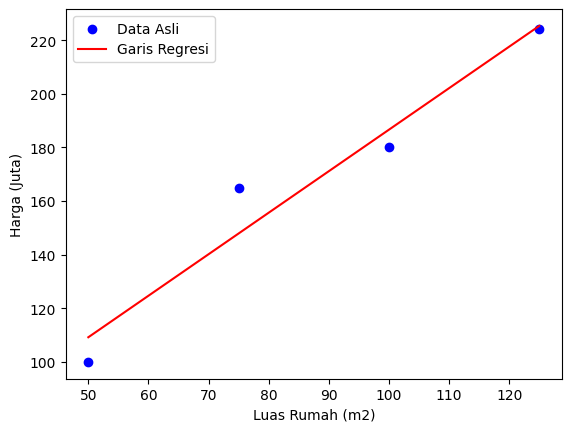

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. DATA DARI MODUL (Luas vs Harga)
# X (Luas) harus 2D array
X_luas = np.array([[50], [75], [100], [125]]) 
# y (Harga) 1D array
y_harga = np.array([100, 165, 180, 224])

# 2. LATIH MODEL (Mencari Garis Terbaik / OLS)
model = LinearRegression()
model.fit(X_luas, y_harga)

# 3. BEDAH ISI OTAK MODEL (Mengambil Parameter)
intercept = model.intercept_  # Ini nilai 'a'
koefisien = model.coef_[0]    # Ini nilai 'b' (Slope)

print(f"Intercept (a): {intercept:.2f}")
print(f"Koefisien (b): {koefisien:.2f}")

# 4. RUMUS JADI
print(f"\nRumus Matematika yang ditemukan AI:")
print(f"Harga = {intercept:.2f} + ({koefisien:.2f} * Luas_Rumah)")

# 5. VISUALISASI
plt.scatter(X_luas, y_harga, color='blue', label='Data Asli')
plt.plot(X_luas, model.predict(X_luas), color='red', label='Garis Regresi')
plt.xlabel('Luas Rumah (m2)')
plt.ylabel('Harga (Juta)')
plt.legend()
plt.show()

In [2]:
# ... (lanjutan dari kode sebelumnya)

# 1. Hitung Prediksi untuk semua data luas
y_prediksi = model.predict(X_luas)

# 2. Hitung Residual (Asli - Prediksi)
residual = y_harga - y_prediksi

# 3. Tampilkan dalam Tabel biar enak dilihat
import pandas as pd

df_cek = pd.DataFrame({
    'Luas Rumah': X_luas.flatten(),
    'Harga Asli (y)': y_harga,
    'Prediksi AI (y_hat)': y_prediksi,
    'RESIDUAL (Error)': residual
})

print("=== Laporan Kesalahan (Residual) ===")
print(df_cek)

=== Laporan Kesalahan (Residual) ===
   Luas Rumah  Harga Asli (y)  Prediksi AI (y_hat)  RESIDUAL (Error)
0          50             100                109.2              -9.2
1          75             165                147.9              17.1
2         100             180                186.6              -6.6
3         125             224                225.3              -1.3


X Biasa:
 [[1]
 [2]
 [3]]
X Poly (Ada pangkatnya):
 [[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


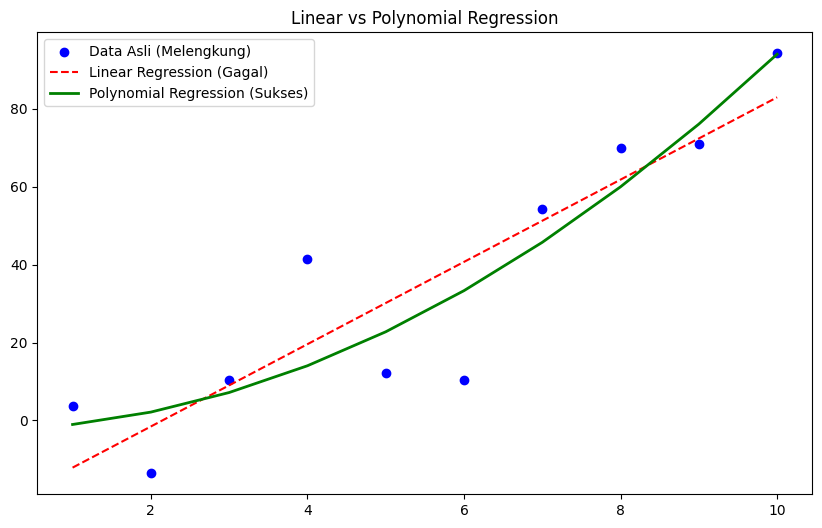

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. BIKIN DATA PURA-PURA (Pola Melengkung / Kuadratik)
# X = angka 1 sampai 10
X = np.arange(1, 11).reshape(-1, 1)
# y = X kuadrat + sedikit noise random (biar gak mulus banget)
y = X**2 + np.random.normal(0, 10, size=(10, 1))

# --- MODEL 1: LINEAR REGRESSION (Si Kaku) ---
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

# --- MODEL 2: POLYNOMIAL REGRESSION (Si Fleksibel) ---
# Trik: Ubah X biasa menjadi X yang punya pangkat (Polynomial Features)
# degree=2 artinya kita mau pangkat 2 (Parabola)
poly_converter = PolynomialFeatures(degree=2)
X_poly = poly_converter.fit_transform(X)

# Lihat bedanya X biasa vs X Poly
print("X Biasa:\n", X[:3])
print("X Poly (Ada pangkatnya):\n", X_poly[:3])

# Latih Linear Regression tapi pakai data yang SUDAH DIPANGKATKAN
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

# --- VISUALISASI PERTANDINGAN ---
plt.figure(figsize=(10, 6))

# Data Asli
plt.scatter(X, y, color='blue', label='Data Asli (Melengkung)')

# Garis Linear (Merah)
plt.plot(X, y_pred_linear, color='red', linestyle='--', label='Linear Regression (Gagal)')

# Garis Polynomial (Hijau)
plt.plot(X, y_pred_poly, color='green', linewidth=2, label='Polynomial Regression (Sukses)')

plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()

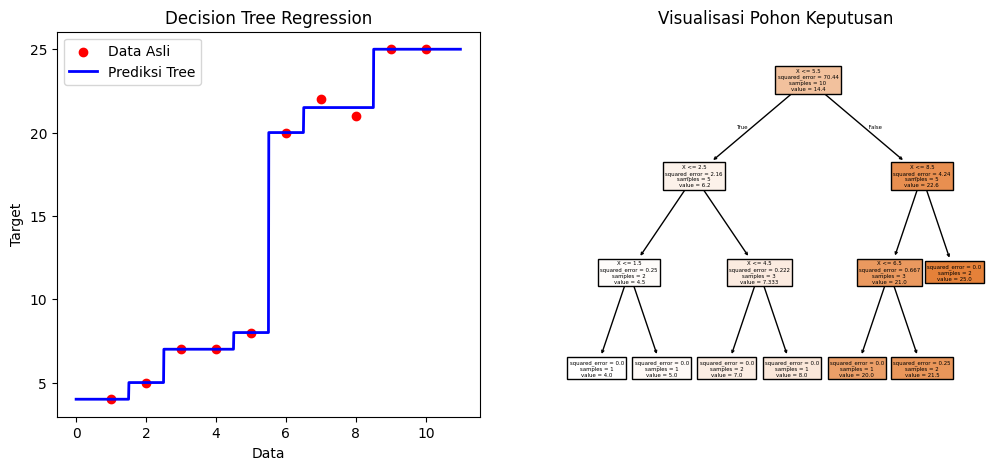

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# 1. DATA DUMMY (Sederhana)
# X = Angka 1 sampai 10
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
# y = Angka acak tapi naik
y = np.array([4, 5, 7, 7, 8, 20, 22, 21, 25, 25])

# 2. LATIH MODEL DECISION TREE
# Kita batasi max_depth=3 (Cuma boleh tanya 3 kali) biar gak overfitting
model_tree = DecisionTreeRegressor(max_depth=3)
model_tree.fit(X, y)

# 3. PREDIKSI (Bikin garis resolusi tinggi biar kelihatan tangganya)
X_test = np.arange(0.0, 11.0, 0.01)[:, np.newaxis]
y_pred = model_tree.predict(X_test)

# 4. VISUALISASI 1: GRAFIK PREDIKSI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label="Data Asli")
plt.plot(X_test, y_pred, color='blue', label="Prediksi Tree", linewidth=2)
plt.title("Decision Tree Regression")
plt.xlabel("Data")
plt.ylabel("Target")
plt.legend()

plt.subplot(1, 2, 2)
plot_tree(model_tree, filled=True, feature_names=['X'])
plt.title("Visualisasi Pohon Keputusan")

plt.show()

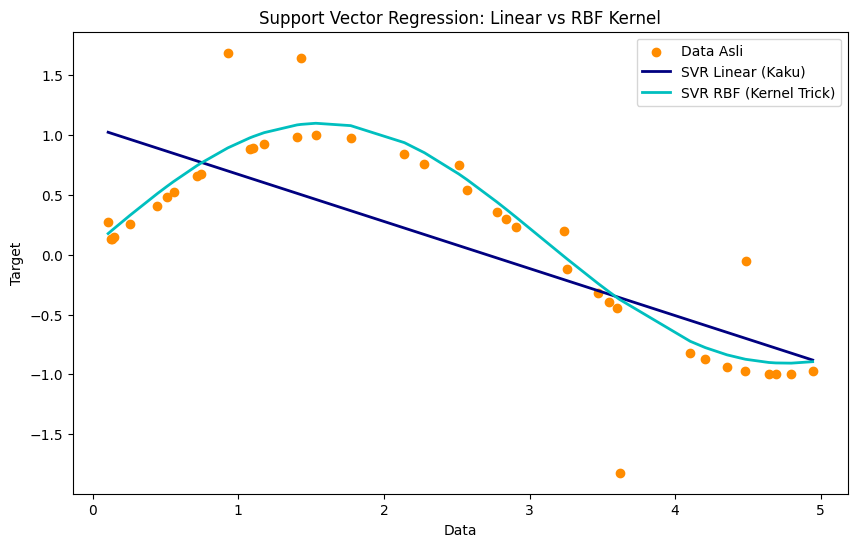

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 1. BIKIN DATA GELOMBANG (Sinus) + NOISE
# X = angka 0 sampai 5
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# y = sin(x)
y = np.sin(X).ravel()
# Tambah sedikit pengacau (noise) pada y
y[::5] += 3 * (0.5 - np.random.rand(8))

# 2. LATIH 2 MODEL SVR BERBEDA
# Model A: Linear (Si Kaku)
# C=100 (Sangat ketat, gak mau salah)
svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)

# Model B: RBF (Si Fleksibel / Kernel Trick)
# C=100, gamma=0.1 (Kekuatan lengkungan)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr_lin.fit(X, y)
svr_rbf.fit(X, y)

# 3. PREDIKSI
lw = 2
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Data Asli')

# Plot Linear (Biru)
plt.plot(X, svr_lin.predict(X), color='navy', lw=lw, label='SVR Linear (Kaku)')

# Plot RBF (Hijau)
plt.plot(X, svr_rbf.predict(X), color='c', lw=lw, label='SVR RBF (Kernel Trick)')

plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression: Linear vs RBF Kernel')
plt.legend()
plt.show()

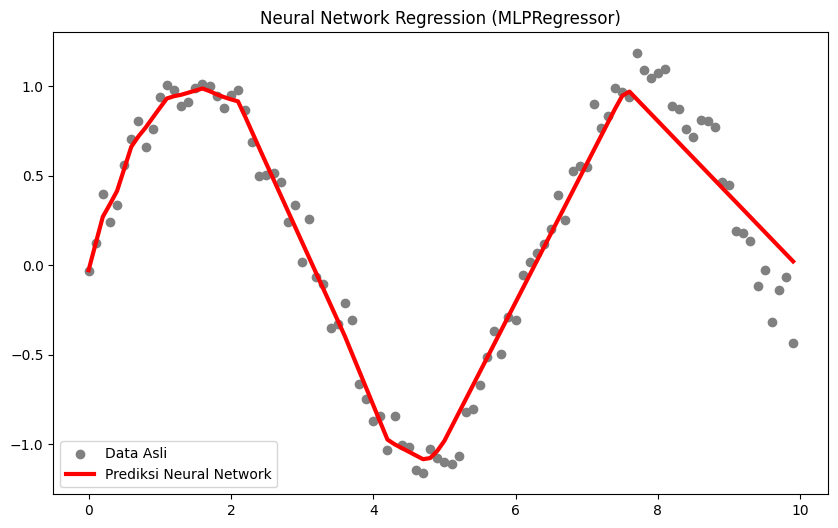

R2 Score: 0.9569


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor # Ini library Neural Network

# 1. DATA (Pola Melengkung/Sinus)
# Kita pakai data yang agak rumit biar NN bisa unjuk gigi
X = np.arange(0.0, 10.0, 0.1).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) # Ada noise dikit

# 2. BANGUN OTAK BUATAN (Neural Network)
# hidden_layer_sizes=(100, 50): Punya 2 lapisan tersembunyi.
# Lapis 1 ada 100 neuron, Lapis 2 ada 50 neuron.
# activation='relu': Fungsi aktivasinya ReLU (standar industri).
# max_iter=2000: Suruh belajar (looping) sampai 2000 kali.
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50),
                        activation='relu',
                        solver='adam',
                        max_iter=2000,
                        random_state=42)

# 3. TRAINING (Latih Otaknya)
nn_model.fit(X, y)

# 4. PREDIKSI
y_pred = nn_model.predict(X)

# 5. VISUALISASI
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data Asli')
plt.plot(X, y_pred, color='red', linewidth=3, label='Prediksi Neural Network')
plt.title('Neural Network Regression (MLPRegressor)')
plt.legend()
plt.show()

# Cek skor akurasi
print(f"R2 Score: {nn_model.score(X, y):.4f}")